## Imports

In [1]:
import tensorflow as tf
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

## Load data

In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [5]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 150
train_split = int(num_files*0.7)
val_split = int(num_files*0.8)
variables = ["REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_train = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
data_list = []
for p, patch_file in enumerate(patch_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_val = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)
data_list = []
for p, patch_file in enumerate(patch_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {patch_file}')
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
input_test = xr.concat(data_list, dim="p")["REFL_COM_curr"].expand_dims("channel", axis = -1)

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_2

In [6]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:train_split]):
    if p % 10 == 0:
        print(f'Train {p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_train = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[train_split:val_split]):
    if p % 10 == 0:
        print(f'Validation {train_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_val = xr.concat(csv_data_list, dim="p").to_array().transpose()
csv_data_list = []
for p, csv_file in enumerate(csv_files[val_split:num_files]):
    if p % 10 == 0:
        print(f'Test {val_split + p}, {csv_file}')
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
output_test = xr.concat(csv_data_list, dim="p").to_array().transpose()

Train 0, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
Train 10, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
Train 20, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
Train 30, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
Train 40, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
Train 50, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
Train 60, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
Train 70, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
Train 80, /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTO

In [7]:
print(input_train.shape)
print(input_val.shape)
print(input_test.shape)
print(output_train.shape)
print(output_val.shape)
print(output_test.shape)

(34061, 144, 144, 1)
(4300, 144, 144, 1)
(12985, 144, 144, 1)
(34061, 2)
(4300, 2)
(12985, 2)


## Normalize data

In [7]:
# Normalize the training data
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [8]:
# Normalize output data
output_scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
output_scale_stats.loc[0, "mean"] = output_train.mean()
output_scale_stats.loc[0, "sd"] = output_train.std()
output_train_norm = (output_train - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]
output_val_norm = (output_val - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]
output_test_norm = (output_test - output_scale_stats.loc[0, "mean"]) / output_scale_stats.loc[0, "sd"]

## RICNN

In [15]:
gdl_model = models.Sequential()
gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
gdl_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
gdl_model.add(GDL_layers.RotInvPool())
gdl_model.add(layers.Flatten())
gdl_model.add(layers.Dense(32, activation='relu'))
gdl_model.add(layers.Dense(2))

In [16]:
gdl_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rot_equiv_conv2d_5 (RotEqui  (None, 142, 142, 4, 32)  320       
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_4 (RotEqui  (None, 71, 71, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_6 (RotEqui  (None, 69, 69, 4, 32)    9248      
 vConv2D)                                                        
                                                                 
 rot_equiv_pool2d_5 (RotEqui  (None, 34, 34, 4, 32)    0         
 vPool2D)                                                        
                                                                 
 rot_equiv_conv2d_7 (RotEqui  (None, 32, 32, 4, 64)   

In [17]:
gdl_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [18]:
gdl_history = gdl_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1065/1065 [==============================] - 74s 65ms/step - loss: 0.2412 - mse: 0.2412 - val_loss: 0.1336 - val_mse: 0.1336
Epoch 2/10
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0909 - mse: 0.0909 - val_loss: 0.0722 - val_mse: 0.0722
Epoch 3/10
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0627 - mse: 0.0627 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 4/10
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 5/10
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 6/10
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 7/10
1065/1065 [==============================] - 69s 65ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 8/10
1065/1065 [==========================

## CNN

In [19]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dense(2))

In [20]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)      

In [21]:
cnn_model.compile(
    optimizer='nadam',
    loss='mse',
    metrics=['mse']
)

In [22]:
cnn_history = cnn_model.fit(x=input_train_norm, y=output_train_norm, epochs=10, validation_data=(input_val_norm, output_val_norm))

Epoch 1/10
1065/1065 [==============================] - 14s 12ms/step - loss: 0.3598 - mse: 0.3598 - val_loss: 0.1777 - val_mse: 0.1777
Epoch 2/10
1065/1065 [==============================] - 13s 12ms/step - loss: 0.1581 - mse: 0.1581 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 3/10
1065/1065 [==============================] - 13s 12ms/step - loss: 0.1045 - mse: 0.1045 - val_loss: 0.1556 - val_mse: 0.1556
Epoch 4/10
1065/1065 [==============================] - 13s 12ms/step - loss: 0.0793 - mse: 0.0793 - val_loss: 0.1967 - val_mse: 0.1967
Epoch 5/10
1065/1065 [==============================] - 13s 12ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 6/10
1065/1065 [==============================] - 13s 12ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 7/10
1065/1065 [==============================] - 13s 12ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 8/10
1065/1065 [==========================

## History Plots

(0.0, 0.37649797946214675)

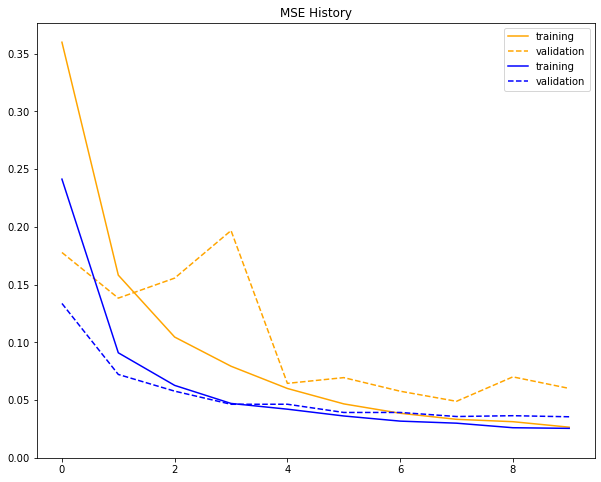

In [23]:
F, ax = plt.subplots(figsize=(10, 8))
ax = plt.gca()
a = ax.plot(cnn_history.history['mse'], label='training', color='orange')
b = ax.plot(cnn_history.history['val_mse'], label='validation', color='orange', linestyle='dashed')
c = ax.plot(gdl_history.history['mse'], label='training', color='blue')
d = ax.plot(gdl_history.history['val_mse'], label='validation', color='blue', linestyle='dashed')
ax.legend()
ax.set_title("MSE History")
ax.set_ylim(bottom=0)

## Save and load models

In [24]:
gdl_model.save("saved_models/initial_rot_inv_CNN/gdl_model")
cnn_model.save("saved_models/initial_rot_inv_CNN/cnn_model")

INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/gdl_model/assets


INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/cnn_model/assets


INFO:tensorflow:Assets written to: saved_models/initial_rot_inv_CNN/cnn_model/assets


In [9]:
gdl_model = tf.keras.models.load_model("saved_models/initial_rot_inv_CNN/gdl_model")
cnn_model = tf.keras.models.load_model("saved_models/initial_rot_inv_CNN/cnn_model")

2022-07-14 13:21:17.128390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-14 13:21:17.670900: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30987 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:88:00.0, compute capability: 7.0


## Evaluate models

In [26]:
gdl_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 9s 23ms/step - loss: 0.0416 - mse: 0.0416


[0.041642844676971436, 0.041642844676971436]

In [27]:
cnn_model.evaluate(input_test_norm, output_test_norm)

406/406 [==============================] - 3s 7ms/step - loss: 0.0659 - mse: 0.0659


[0.06590066105127335, 0.06590066105127335]

## Sort prediction error by major axis length

In [10]:
preds = gdl_model.predict(input_test_norm)

2022-07-14 13:21:29.507407: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


406/406 [==============================] - 11s 22ms/step


In [11]:
preds_err = np.mean(np.square(preds - output_test_norm), 1)

In [92]:
unnorm_preds = preds * output_scale_stats.loc[0, "sd"].values + output_scale_stats.loc[0, "mean"].values

In [93]:
preds_err_df = pd.DataFrame(
    np.column_stack(
        (unnorm_preds[:, 0], unnorm_preds[:, 1], preds_err, output_test[:, 0], output_test[:, 1])
    ),
    columns=["pred_maj_axis", "pred_min_axis", "pred_err", "maj_axis", "min_axis"]
)

In [94]:
preds_err_df

,pred_maj_axis,pred_min_axis,pred_err,maj_axis,min_axis
0,9.047734,5.304562,0.004922,6.45896,5.15650
1,7.947284,5.319785,0.000534,7.20646,4.89540
2,11.675569,6.726908,0.003438,9.73031,5.77172
3,17.882799,11.990079,0.000758,17.19186,11.24317
4,29.976795,13.334259,0.000903,31.07169,13.52182
...,...,...,...,...,...
12980,9.486673,6.711552,0.001331,8.22565,6.23329
12981,5.826489,4.612477,0.000340,5.54259,3.99328
12982,9.694403,8.902540,0.001439,8.87742,7.76300
12983,64.144653,35.041679,0.053109,59.14711,41.93918


In [95]:
sorted_preds_df = preds_err_df.sort_values("maj_axis")

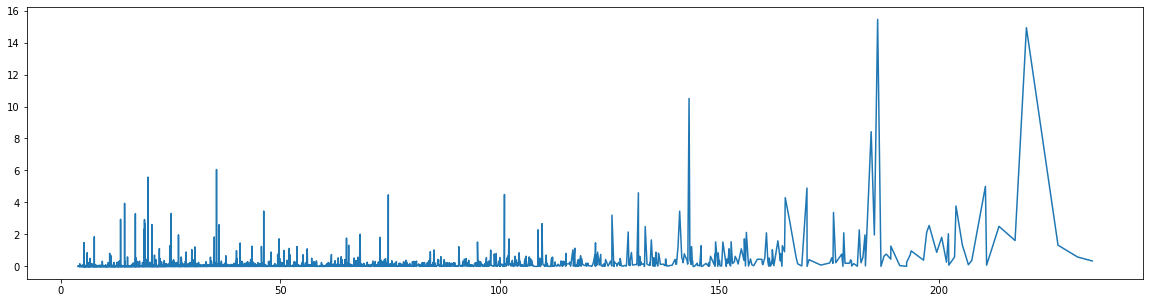

In [96]:
F, ax = plt.subplots(figsize=(20, 5))
ax.plot(sorted_preds_df["maj_axis"], sorted_preds_df["pred_err"])

In [97]:
high_err_examples = sorted_preds_df[sorted_preds_df.pred_err >= 1]
high_err_examples

,pred_maj_axis,pred_min_axis,pred_err,maj_axis,min_axis
2098,47.546783,20.261015,1.496274,5.25874,4.26875
7478,51.748489,29.674793,1.856504,7.61592,5.41679
4278,76.440491,16.568682,2.949086,13.59905,7.64444
544,87.236496,18.792292,3.946062,14.51483,8.68300
770,79.652618,38.018532,3.301805,16.96893,13.90867
...,...,...,...,...,...
660,128.155426,66.225227,5.006907,210.59799,59.66313
3469,155.182251,42.622932,2.506726,213.69110,41.57237
8496,170.306931,40.964775,1.622727,217.34745,42.95631
8499,80.087410,20.526493,14.926421,219.93500,49.39419


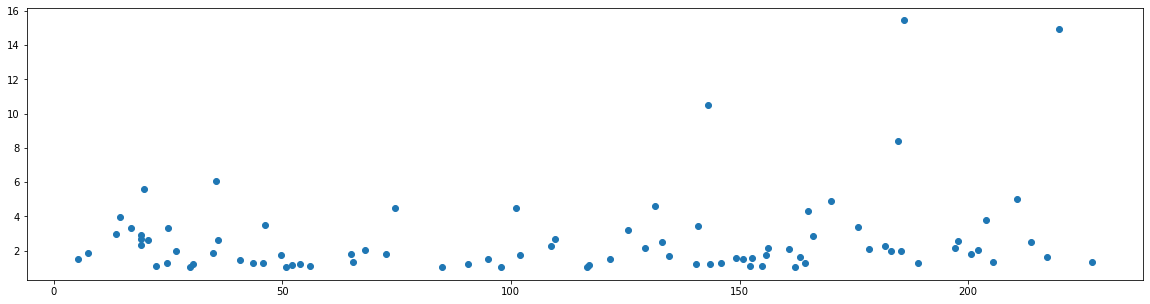

In [57]:
F, ax = plt.subplots(figsize=(20, 5))
ax.scatter(high_err_examples.maj_axis, high_err_examples.pred_err)

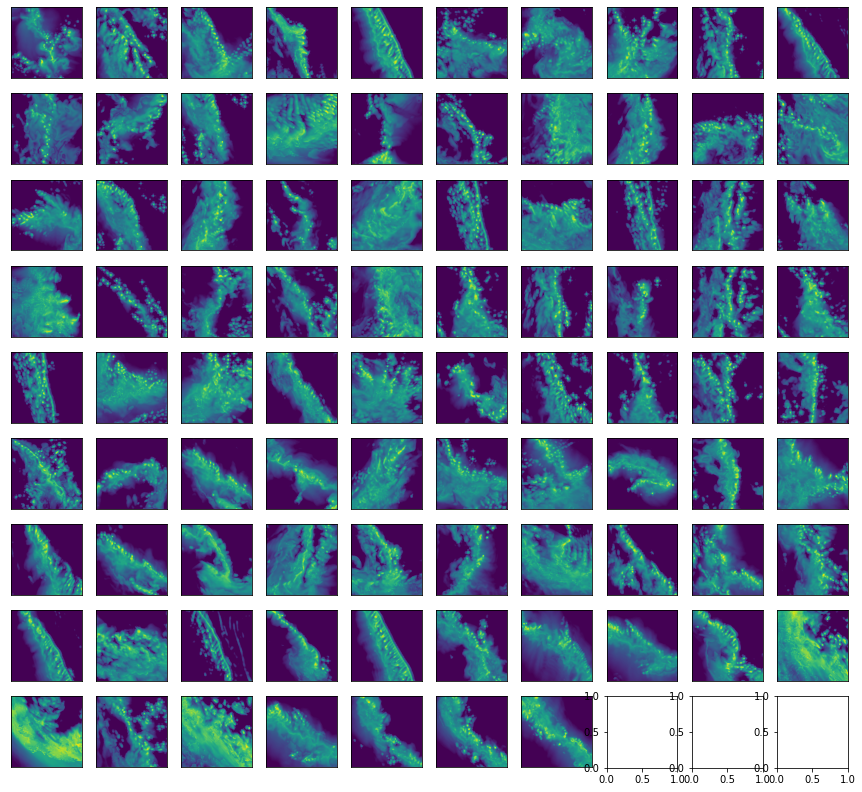

In [66]:
# Plot high error examples sorted by increasing major axis lengths
F, ax = plt.subplots(9, 10, figsize=(15, 14))
for num, ind in enumerate(high_err_examples.index):
    i = num // 10
    j = num % 10
    ax[i, j].imshow(input_test_norm[ind, :, :, 0])
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

In [98]:
v_high_err_examples = sorted_preds_df[sorted_preds_df.pred_err >= 8]
v_high_err_examples

,pred_maj_axis,pred_min_axis,pred_err,maj_axis,min_axis
3928,26.214203,11.893308,10.506505,143.09155,38.20711
586,77.408401,18.364836,8.425763,184.57208,13.24482
771,41.417229,21.619314,15.449646,186.04809,35.30773
8499,80.087410,20.526493,14.926421,219.93500,49.39419


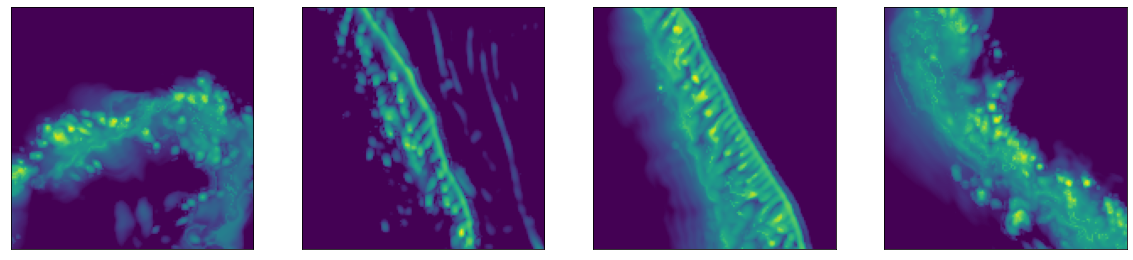

In [73]:
F, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, ind in enumerate(v_high_err_examples.index):
    ax[i].imshow(input_test_norm[ind, :, :, 0])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
F.set_facecolor("white")

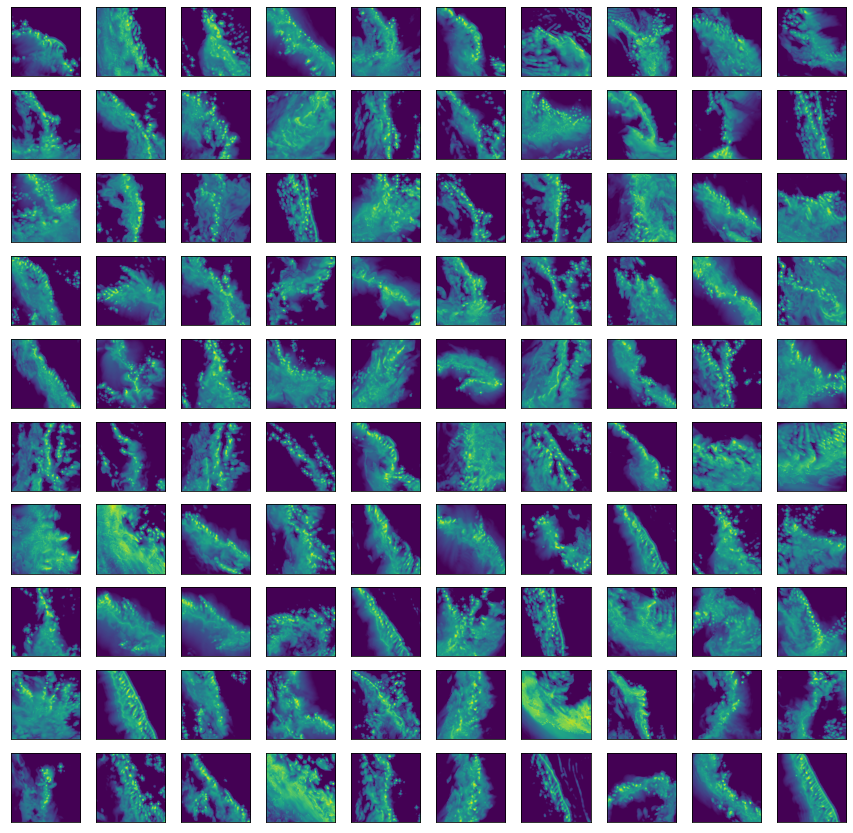

In [62]:
# Plot the 100 worst errors
F, ax = plt.subplots(10, 10, figsize=(15, 15))
for num, ind in enumerate(preds_err_df.sort_values("pred_err")[-100:].index):
    i = num // 10
    j = num % 10
    ax[i, j].imshow(input_test_norm[ind, :, :, 0])
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
F.set_facecolor("white")

## Build latent space models

In [28]:
latent_predictor = tf.keras.Model(gdl_model.inputs, gdl_model.layers[-2].output)

In [29]:
gdl_l_preds = latent_predictor.predict(input_test_norm)

406/406 [==============================] - 9s 22ms/step


In [41]:
latent_predictor.predict(np.rot90(input_test_norm[0:1], 1, axes=(1, 2)))

1/1 [==============================] - 0s 18ms/step


array([[0.37239674, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 3.534404  , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 2.7412846 , 4.204309  ,
        0.        , 0.        ]], dtype=float32)

In [31]:
cnn_latent_predictor = tf.keras.Model(cnn_model.inputs, cnn_model.layers[-2].output)

In [32]:
cnn_l_preds = cnn_latent_predictor.predict(np.rot90(input_test_norm, 0, axes=(1, 2)))

406/406 [==============================] - 1s 2ms/step


In [33]:
cnn_latent_predictor.predict(np.rot90(input_test_norm[0:1], 3, axes=(1, 2)))

1/1 [==============================] - 0s 45ms/step


array([[0.       , 0.       , 1.6409959, 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 2.0274942, 0.       , 2.5081398, 0.       , 0.       ,
        2.6167417, 0.       , 0.       , 3.5695765, 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       ]], dtype=float32)

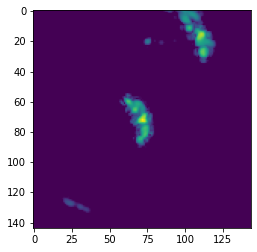

In [34]:
plt.imshow(input_test_norm[0:1][0, :, :, 0])

## Analyze sparsity of latent space

In [99]:
gdl_uniq, gdl_counts = np.unique(gdl_l_preds.nonzero()[0], return_counts=True)
gdl_counts.mean()

3.5441663457835966

(array([ 133.,  477., 8468., 2662.,  433.,  285.,  136.,   89.,   58.,
          68.,   66.,   60.,   25.,   16.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <BarContainer object of 14 artists>)

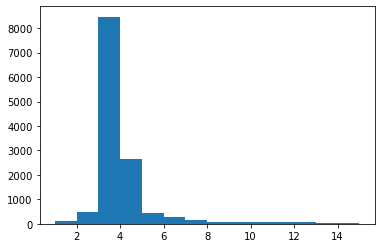

In [103]:
plt.hist(gdl_counts, np.arange(1, 16))

In [44]:
np.unique(gdl_l_preds.nonzero()[1]).shape

(18,)

In [ ]:
## Plot examples

In [39]:
cnn_uniq, cnn_counts = np.unique(cnn_l_preds.nonzero()[0], return_counts=True)
cnn_counts.mean()

4.846592221794378

(array([   0.,   66.,  791., 2307., 8548.,  732.,  341.,  132.,   68.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 9 artists>)

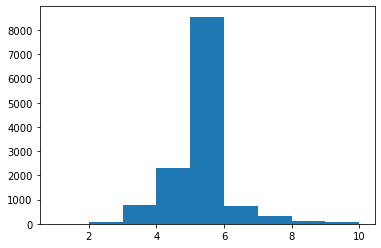

In [102]:
plt.hist(cnn_counts, np.arange(1, 11))

In [40]:
np.unique(cnn_l_preds.nonzero()[1]).shape

(13,)

In [42]:
gdl_train_pred = latent_predictor.predict(input_train_norm)

1065/1065 [==============================] - 23s 22ms/step


In [43]:
cnn_train_pred = cnn_latent_predictor.predict(input_train_norm)

1065/1065 [==============================] - 6s 6ms/step


In [45]:
gdl_train_uniq, gdl_train_counts = np.unique(gdl_train_pred.nonzero()[0], return_counts=True)
gdl_train_counts.mean()

3.661078653004903

In [47]:
np.unique(gdl_train_pred.nonzero()[1]).shape

(25,)

In [48]:
cnn_train_uniq, cnn_train_counts = np.unique(cnn_train_pred.nonzero()[0], return_counts=True)
cnn_train_counts.mean()

4.845042717477467

In [49]:
np.unique(cnn_train_pred.nonzero()[1]).shape

(14,)